## Library implementation of One-Class SVM

We will start by just using synthetic data.
First, initialize and train the SVM.

In [ ]:
%load_ext autoreload
%autoreload 2
#this will import new versions of my code so I don't lose my mind

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import pandas as pd
import numpy as np
import sys, os
sys.path.append(os.path.abspath("..")) #need to do this to find src
from src.models.library_svm import OCSVM
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the synthetic dataset
df = pd.read_csv("../data/synthetic_blobs_anomalies.csv")
X = df[["feature_1", "feature_2"]].values
y_true = df["label"].values

# Split into training and testing data
# Train only on normal (label=0) data
X_train = X[y_true == 0]
X_test = X  # evaluate on everything (including anomalies)

# Initialize and train the detector
ocsvm = OCSVM(kernel="rbf", nu=0.05, gamma="scale") # these are the default parameters anyway 
ocsvm.fit(X_train)

# Predict (+1 normal, -1 anomaly)
y_pred = ocsvm.predict(X_test)
y_pred_binary = np.where(y_pred == 1, 0, 1)  # map +1→0 (normal), -1→1 (anomaly)

In [44]:
# Evaluate
print("Confusion Matrix format:")
print("|    True and predicted normal       |   True normal, predicted anomaly  |")
print("|  True anomaly, predicted normal    |     True and predicted anomaly    |\n")
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_binary))
print("\nClassification Report:")
print(classification_report(y_true, y_pred_binary, target_names=["normal", "anomaly"]))

Confusion Matrix format:
|    True and predicted normal       |   True normal, predicted anomaly  |
|  True anomaly, predicted normal    |     True and predicted anomaly    |

Confusion Matrix:
[[952  48]
 [  2   8]]

Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.95      0.97      1000
     anomaly       0.14      0.80      0.24        10

    accuracy                           0.95      1010
   macro avg       0.57      0.88      0.61      1010
weighted avg       0.99      0.95      0.97      1010



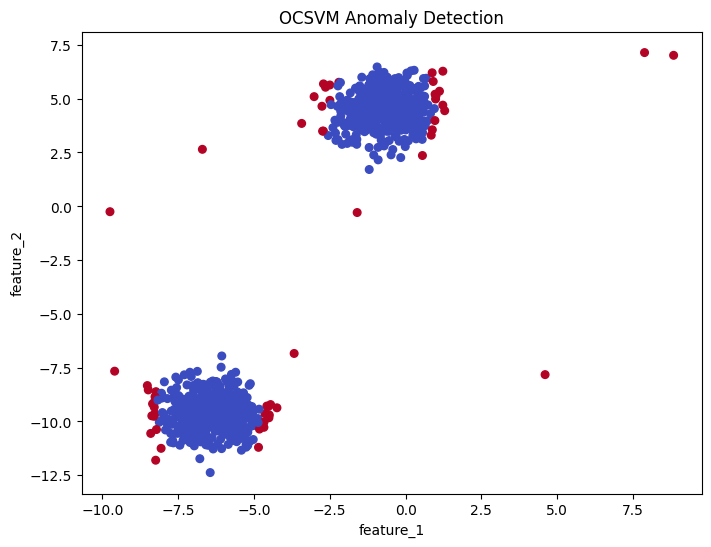

In [45]:
# Plotting the results for visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred_binary, cmap="coolwarm", s=30)
plt.title("OCSVM Anomaly Detection")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()

Let's look at what the decision boundary looks like for our OCSVM.

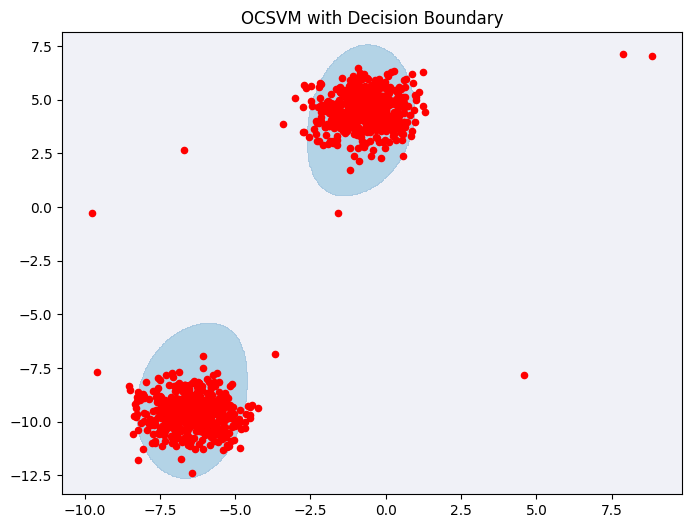

In [46]:
# Create the grid
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 500),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 500)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict on the grid
Z = ocsvm.predict(grid)  #1 for normal, -1 for anomalies (predictions)
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, levels=[-1,0,1], cmap=plt.cm.PuBu, alpha=0.3)  # background
plt.scatter(X[:,0], X[:,1], c='red', s=20, label='Data')
plt.title("OCSVM with Decision Boundary")
plt.show()


I want to make that code up there its own method:

In [ ]:
def decision_boundary(model, X):
    # Create the grid
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-1, X[:,0].max()+1, 500),
        np.linspace(X[:,1].min()-1, X[:,1].max()+1, 500)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict on the grid
    Z = model.predict(grid)  #1 for normal, -1 for anomalies (predictions)
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, levels=[-1,0,1], cmap=plt.cm.PuBu, alpha=0.3)  # background
    plt.scatter(X[:,0], X[:,1], c='red', s=20, label='Data')
    plt.title("OCSVM with Decision Boundary")
    plt.show()

##Now, we will look at running this library SVM with data from the Intel Berkeley Research Lab dataset. 

In [ ]:
import importlib
from src.data import loader
importlib.reload(loader)
ibrl = loader.ibrl
#this will import new versions of my code so I don't lose my mind

# from src.data.loader import ibrl

current_path = os.getcwd()
print("Current working directory:", current_path)

train, val, eval = ibrl()

ocsvm_2 = OCSVM(kernel="rbf", nu=0.05, gamma="scale") # these are the default parameters anyway 
ocsvm.fit(train)

y_pred = ocsvm.predict(val)

decision_boundary(ocsvm_2, val)


Current working directory: /Users/gracemadison/Documents/TCDcapstone-SVM/notebooks
[[ 3.62676888 -0.83149113]
 [-1.16210535 -0.48829647]
 [-1.17568316 -0.50791044]
 ...
 [-0.2313835  -0.73295425]
 [-0.23328533 -0.73346223]
 [-0.23153473 -0.73295123]]
